# Data

- Area Volume - Buy
    - Total Regions : 13
        - N1 : North Region	[Jammu and Kashmir, Himachal Pradesh, Chandigarh, Haryana]
        - N2 : North Region	[Uttar Pradesh , Uttaranchal, Rajasthan, Delhi]
        - N3 : North Region	[Punjab]
        - E1 : East Region	[West Bengal, Sikkim, Bihar, Jharkhand]
        - E2 : East Region	[Orissa]
        - W1 : West Region	[Madhaya Pradesh]
        - W2 : West Region	[Maharashtra, Gujarat, Daman and Diu, Dadar and Nagar Haveli, North Goa]
        - W3 : West Region	[Chhattisgarh]
        - S1 : South Region	[Andhra Pradesh, Telangana, Karnataka, Pondicherry (Yanam), South Goa]
        - S2 : South Region	[Tamil Nadu, Pondicherry (Puducherry), Pondicherry (Karaikal), Pondicherry (Mahe)]
        - S3 : South Region	[Kerala]
        - A1 : North East Region	[Tripura, Manipur, Mizoram, Nagaland]
        - A2 : North East Region	[Assam, Arunachal Pradesh, Meghalaya]

![url/filename.gif](https://www.iexindia.com/img/bidmap.gif)
![image](./data/Images/Mean_sd_all_region.png)

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from statsmodels.tsa.seasonal import seasonal_decompose

from neuralprophet import NeuralProphet

#To mute Warnings
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [596]:
# Weekly
df_w_2020_23 = pd.read_csv('./data/VolumeDataset_2020_to_2023.csv')

# Monthly
df_m_2020_23 = pd.read_csv('./data/Month_clean_data.csv')


In [597]:
#  Made Date index column 
dates = df_w_2020_23.Year*100+df_w_2020_23.Week
df_w_2020_23['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_w_2020_23 = df_w_2020_23.set_index('Date')

df_m_2020_23 = df_m_2020_23.set_index('Date')



for df in [df_w_2020_23, df_m_2020_23]:
    display(df.head())

,Year,Week,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,,
2020-01-12,2020,1,16911.93,33756.53,48253.47,51912.76,34120.12,48682.29,0.0,118862.33,8394.66,604.80,164894.79,70374.62,185102.58,781869.95,788121.16
2020-01-19,2020,2,16678.16,35520.72,68177.88,57986.37,42388.81,75084.86,0.0,148760.74,19815.62,650.20,257190.84,87611.24,304985.01,1114849.33,1129493.91
2020-01-26,2020,3,18848.19,23953.29,74396.13,39749.67,50518.35,90128.99,0.0,147718.97,22392.94,832.80,209441.27,90702.62,245815.56,1014497.72,1014497.72
2020-02-02,2020,4,13864.97,30214.57,66323.83,74711.48,44585.04,156190.36,0.0,162732.93,32756.68,750.60,181776.78,133732.89,159148.69,1056787.47,1056787.45
2020-02-09,2020,5,19588.03,27242.09,47763.37,83659.99,60050.33,154508.37,0.0,161117.18,26246.31,695.61,198066.16,132061.48,202806.64,1113804.41,1116246.21


,Month,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,
01-01-2020,1,66303.25,123445.11,257151.31,224360.28,171612.32,370086.50,0.0,578074.97,83359.90,2838.40,813303.68,382421.37,895051.84,3968004.47,3988900.24
01-02-2020,2,74862.97,104828.98,208028.44,434917.15,238676.95,476956.27,0.0,534379.41,142714.33,3102.46,568893.78,675279.49,757637.25,4220272.12,4222713.99
01-03-2020,3,37087.81,144506.05,620054.99,474525.58,326302.03,786295.16,0.0,199910.55,51569.67,2823.86,304063.81,447513.10,1247417.93,4642064.05,4657620.35
01-04-2020,4,42797.94,215447.04,386198.01,469504.46,523446.95,760255.22,0.0,54273.49,42244.35,1558.74,72899.64,507490.71,325247.66,3401358.28,3401358.27
01-05-2020,5,22426.57,147490.98,581634.38,940433.68,796148.85,477740.10,0.0,201199.84,61656.62,3883.37,403408.38,303068.90,844138.11,4783223.72,4783223.66


In [598]:
df_m_2020_23.index = pd.to_datetime(df_m_2020_23.index, format='%d-%m-%Y')


High Mean : ['W3' 'E1' 'N2']
Low Mean : ['W3' 'E1' 'N2' 'W1' 'S1' 'N1' 'E2' 'W2' 'A2' 'S2' 'S3' 'A1' 'N3']

High SD : ['N1' 'E1' 'S3' 'N2' 'W2' 'A2' 'S2' 'A1' 'W3' 'E2' 'W1' 'S1' 'N3']
Low SD : ['W1' 'S1' 'N3']
HM/HV - N2, HM/LV - W3, LM/HV - S2


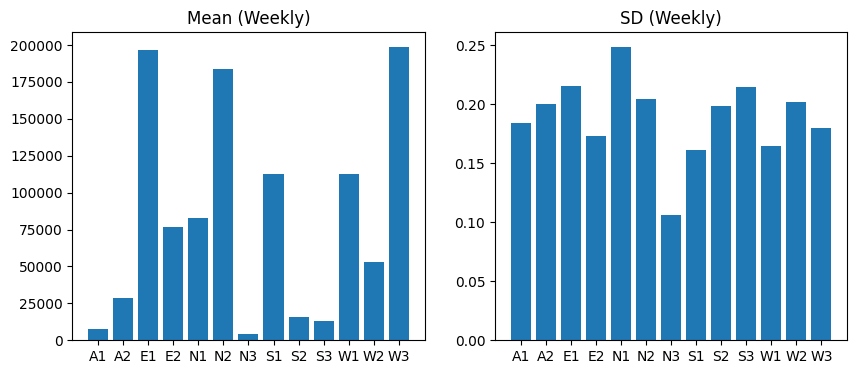

In [599]:
# Normalised Data
w_normalised = df_w_2020_23[['Year', 'Week']]
for region in df_w_2020_23.columns[2:-2]:
    mini = df_w_2020_23[region].min()
    maxi = df_w_2020_23[region].max()
    w_normalised[region] = (df_w_2020_23[region]-mini)/(maxi-mini)

m_normalised = df_m_2020_23[['Month']]
for region in df_m_2020_23.columns[1:-2]:
    mini = df_m_2020_23[region].min()
    maxi = df_m_2020_23[region].max()
    m_normalised[region] = (df_m_2020_23[region]-mini)/(maxi-mini)

# Plot Graph For Mean and SD
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].bar(df_w_2020_23.columns[2:-2],df_w_2020_23.iloc[:, 2:-2].mean())
axes[0].set_title('Mean (Weekly)')
axes[1].set_title('SD (Weekly)')
axes[1].bar(df_w_2020_23.columns[2:-2],w_normalised.iloc[:, 2:].std().rename("SD"))

print(f'High Mean : {df_w_2020_23.iloc[:, 2:-2].mean().sort_values(ascending=False)[:3].index.values}')
print(f'Low Mean : {df_w_2020_23.iloc[:, 2:-2].mean().sort_values(ascending=False)[:].index.values}\n')
print(f'High SD : {w_normalised.iloc[:, 2:].std().sort_values(ascending=False)[:].index.values}')
print(f'Low SD : {w_normalised.iloc[:, 2:].std().sort_values(ascending=False)[-3:].index.values}')

print("HM/HV - N2, HM/LV - W3, LM/HV - S2")

In [513]:
df_w_2020_23.columns[2:-2],df_w_2020_23.iloc[:, 2:-2].mean()

(Index(['A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1', 'S2', 'S3', 'W1', 'W2',
        'W3'],
       dtype='object'),
 A1      7679.659238
 A2     28937.834000
 E1    196564.563000
 E2     76755.123905
 N1     82958.764381
 N2    183538.522286
 N3      3937.049000
 S1    112589.514714
 S2     16062.377810
 S3     13212.611524
 W1    112825.829190
 W2     53080.882857
 W3    198650.200429
 dtype: float64)

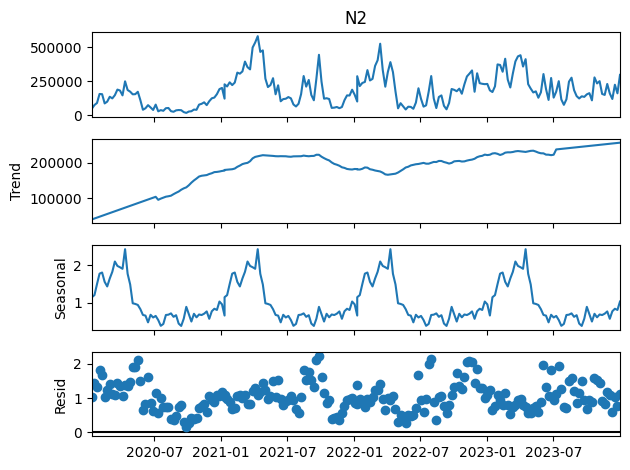

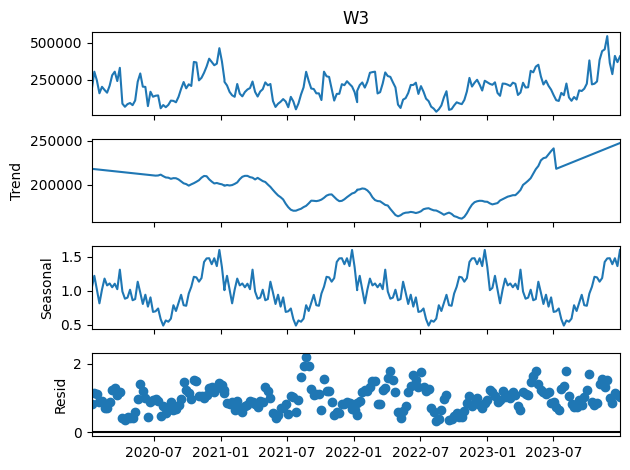

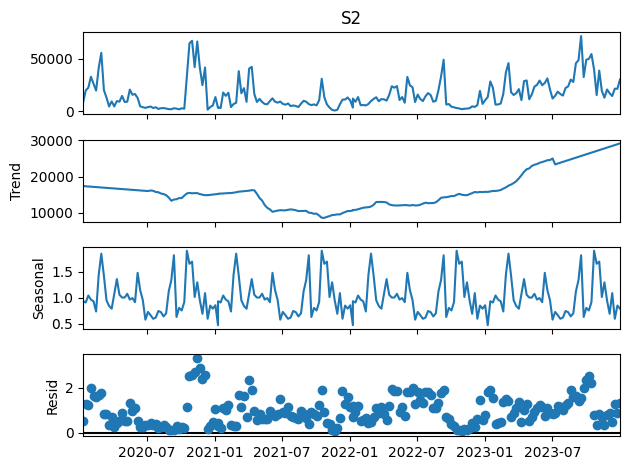

In [514]:
# Seasonal Decompose of N2, W3 and S2
seasonal_decompose(df_w_2020_23['N2'], model='multiplicative', extrapolate_trend='freq', period=53).plot().show()
seasonal_decompose(df_w_2020_23['W3'], model='multiplicative', extrapolate_trend='freq', period=53).plot().show()
seasonal_decompose(df_w_2020_23['S2'], model='multiplicative', extrapolate_trend='freq', period=53).plot().show()

# Neural Prpphet Prediction (Weekly)
    - N2 (High Varience/ High Mean)

In [11]:
from datetime import datetime
temp_delhi = pd.read_excel('./data/temperature/temp_n2_w3_s2/delhi_avg_tem_2020_23.xlsx')
# date = f'{temp_delhi.DayOfMonth}-{temp_delhi.Month}-{temp_delhi.Year}'
temp_delhi.Date = pd.to_datetime(temp_delhi[['Year', 'Month', 'Day']])

In [12]:
# Data
n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
n2_data['Date'] = df_w_2020_23.index
n2_data.columns = ['y','ds']
n2_data = n2_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

n2_data = n2_data.drop(n2_data[n2_data.ds.duplicated(keep='first')].index, axis=0)
n2_data.shape


(208, 2)

In [13]:
temp_delhi

,Day,Year,Month,Date,tavg
0,1,2020,1,2020-01-01,10.8
1,2,2020,1,2020-01-02,13.7
2,3,2020,1,2020-01-03,14.4
3,4,2020,1,2020-01-04,13.6
4,5,2020,1,2020-01-05,14.2
...,...,...,...,...,...
1454,27,2023,12,2023-12-27,49.5
1455,28,2023,12,2023-12-28,47.9
1456,29,2023,12,2023-12-29,50.6
1457,30,2023,12,2023-12-30,56.5


In [14]:
def fun(date):
    v = temp_delhi[temp_delhi.Date == date].tavg.values
    return v[0] if v else 0
n2_data['temperature'] = n2_data.ds.apply(fun)

In [15]:
#  North Region	[Uttar Pradesh , Uttaranchal, Rajasthan, Delhi]
n2_data.columns[1:]

Index(['y', 'temperature'], dtype='object')

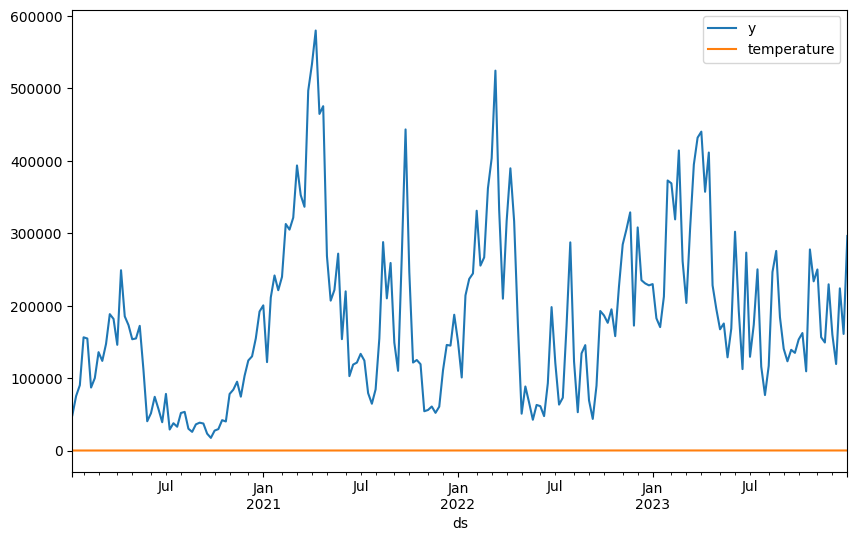

In [16]:
fig = n2_data.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))


In [17]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [18]:
n2 = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 10,
    learning_rate=0.01, quantiles=quantiles)


In [19]:
n2.add_future_regressor("temperature")
n2.add_country_holidays(country_name="IN")


In [20]:
len(n2_data[:133])

133

In [21]:
metrics = n2.fit(n2_data[:123],freq='W', epochs=900)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.187% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Epoch 900: 100%|██████████| 900/900 [00:00<00:00, 6888.85it/s, loss=0.0267, v_num=80, MAE=4e+4, RMSE=5.37e+4, Loss=0.027, RegLoss=0.000]      


In [22]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,415698.781250,500517.687500,1.622127,0.0,0
1,400464.718750,484180.500000,1.547627,0.0,1
2,384537.062500,466164.843750,1.473644,0.0,2
3,370705.531250,453431.156250,1.408385,0.0,3
4,356678.843750,437901.218750,1.343881,0.0,4
...,...,...,...,...,...
895,40083.718750,53717.585938,0.027057,0.0,895
896,40045.777344,53782.121094,0.026997,0.0,896
897,40084.074219,53980.457031,0.027072,0.0,897
898,40101.230469,53657.414062,0.027084,0.0,898


In [23]:
future = n2.make_future_dataframe(n2_data[:123], periods=9, n_historic_predictions=True, regressors_df=n2_data.drop('y', axis=1)[123:133])
forecast = n2.predict(future)
forecast['y']=pd.concat([n2_data['y'][:133]], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.187% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 10.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.248% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.248% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 10 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 32.55it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


<Axes: >

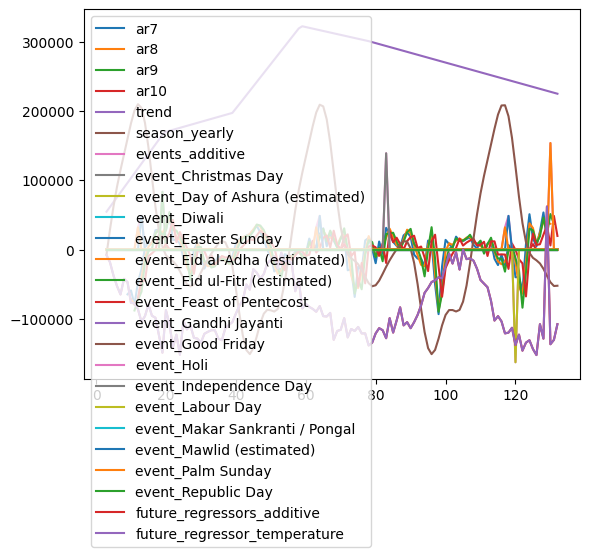

In [53]:
forecast.iloc[:,38:].plot()
# 10, 11, 

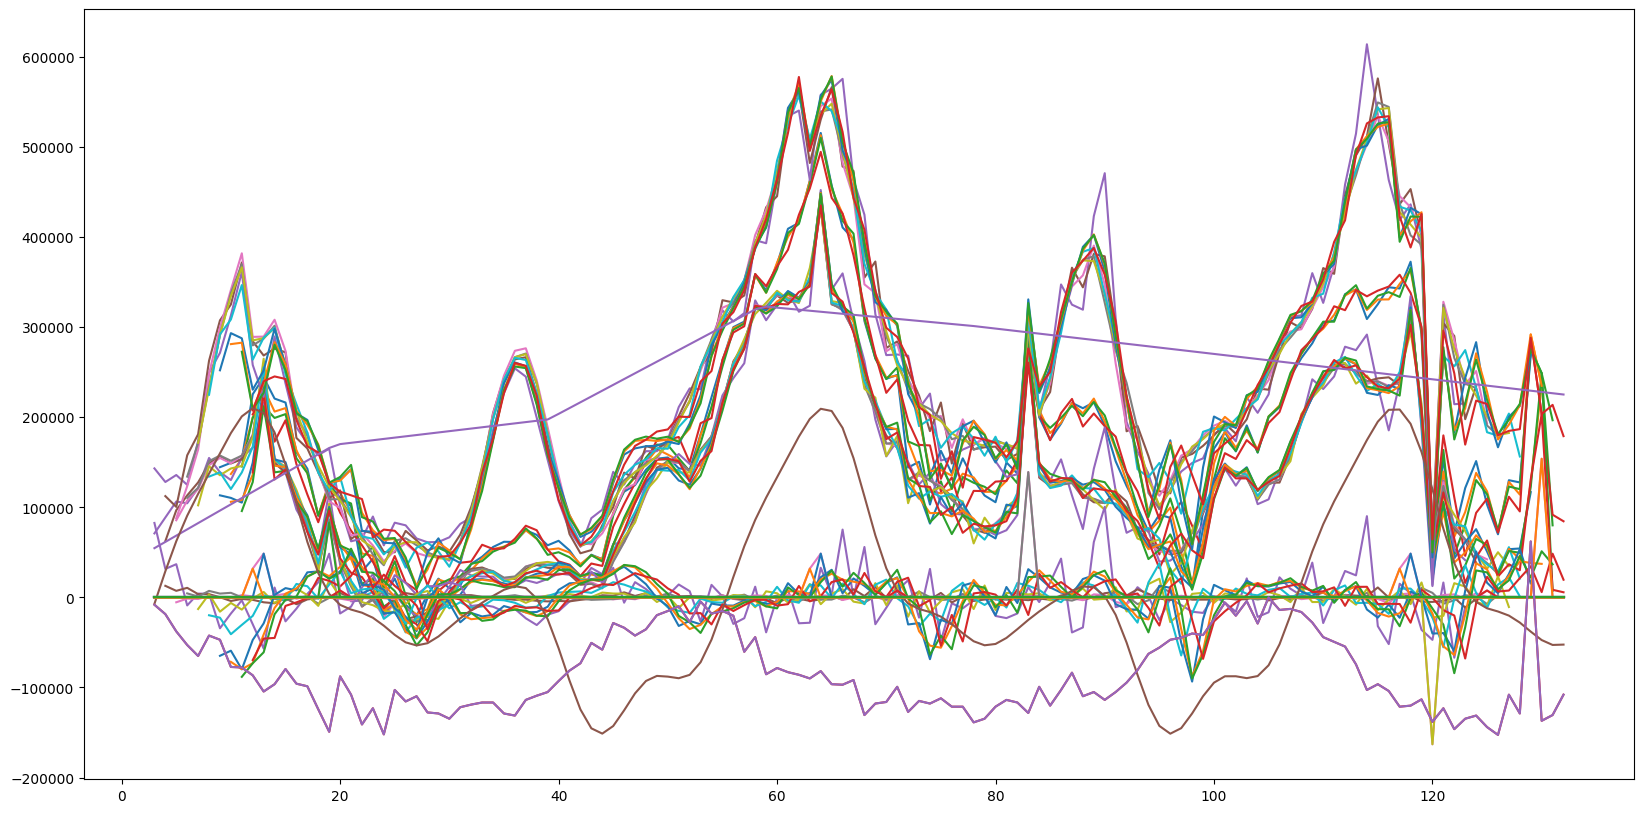

In [33]:
plt.figure(figsize=(20,10))
plt.plot(forecast.iloc[:, 8:])

In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print(round(mean_absolute_error(forecast['y'][123:132], forecast['yhat9'][123:132])))
print(round(root_mean_squared_error(forecast['y'][123:132], forecast['yhat9'][123:132])))
print(round(mean_absolute_error(forecast['y'][123:133], forecast['yhat10'][123:133])))
print(round(root_mean_squared_error(forecast['y'][123:133], forecast['yhat10'][123:133])))

71313
91316
64275
83929


In [ ]:
root_mean_squared_error(forecast['y'][123:133], forecast['yhat10'][123:133])

ValueError: Input contains NaN.

In [129]:
n2.highlight_nth_step_ahead_of_each_forecast(9)
n2.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [28]:
n2.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.


In [29]:
for col in n2_data.columns[1:]:
    mini = n2_data[col].min()
    maxi = n2_data[col].max()
    n2_data[col] = (n2_data[col]-mini)/(maxi-mini)

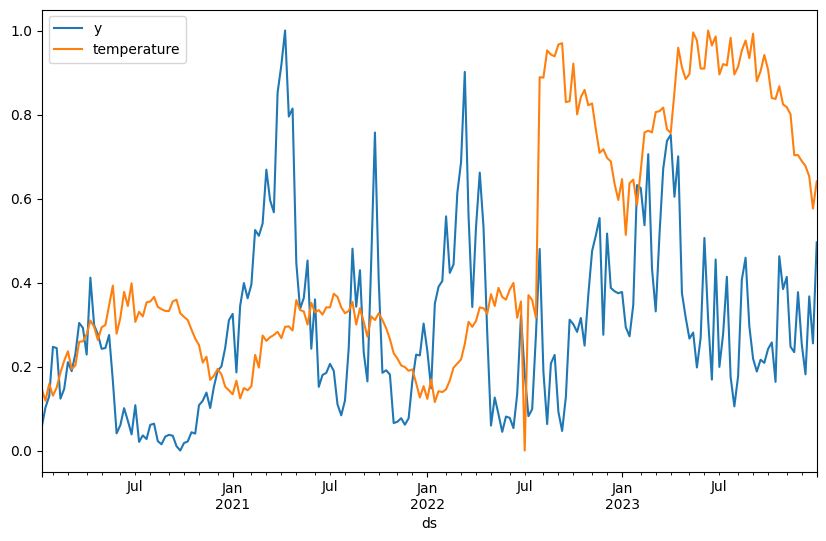

In [30]:
fig = n2_data.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

In [31]:
# Sort by temp
n2_data.sort_values(["temperature"])

,ds,y,temperature
131,2022-07-03,0.183765,0.000000
107,2022-01-16,0.349768,0.115426
1,2020-01-19,0.102593,0.118662
104,2022-01-02,0.236722,0.122977
54,2021-01-17,0.344566,0.124056
...,...,...,...
186,2023-07-23,0.175100,0.982740
182,2023-06-25,0.454772,0.985976
192,2023-09-03,0.218807,0.992449
176,2023-05-14,0.280808,0.995685


In [32]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [33]:
n2_ = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=3,
    n_forecasts = 9,
    learning_rate=0.01, quantiles=quantiles)

In [34]:
n2_.add_future_regressor("temperature")
n2_.add_country_holidays(country_name="IN")


In [35]:
metrics_ = n2_.fit(n2_data[:200],freq='W', epochs=500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Epoch 500: 100%|██████████| 500/500 [00:00<00:00, 5504.32it/s, loss=0.0438, v_num=59, MAE=0.0875, RMSE=0.116, Loss=0.0444, RegLoss=0.000]  


In [36]:
future = n2_.make_future_dataframe(n2_data[:200], periods=9, n_historic_predictions=True, regressors_df=n2_data.drop('y', axis=1)[200:])
forecast = n2_.predict(future)
forecast['y']=pd.concat([n2_data['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in future regressors.
INFO - (NP.data.processing._handle_missing_data) - Dropped 8 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 67.50it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [37]:
print(metrics.tail(1))
print(metrics_.tail(1))

              MAE          RMSE      Loss  RegLoss  epoch
699  49161.128906  65983.492188  0.043572      0.0    699
          MAE      RMSE      Loss  RegLoss  epoch
499  0.087476  0.116475  0.044377      0.0    499


In [38]:
n2_.highlight_nth_step_ahead_of_each_forecast(9)
n2_.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [39]:
n2_.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.


## Predict Quater Jan - April

In [59]:
n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=3,
    n_forecasts = 9,
    learning_rate=0.01, quantiles=quantiles)
n2_ja.add_future_regressor("temperature")
n2_ja.add_country_holidays(country_name="IN")

In [60]:
# data
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)
def fun(date):
    v = temp_delhi[temp_delhi.Date == date].tavg.values
    return v[0] if v else 0
q1_n2_data['temperature'] = q1_n2_data.ds.apply(fun)

In [61]:
q1_n2_data

,ds,y,temperature
0,2020-01-12,48682.29,13.6
1,2020-01-19,75084.86,11.0
2,2020-01-26,90128.99,14.7
3,2020-02-02,156190.36,12.1
4,2020-02-09,154508.37,13.9
...,...,...,...
205,2023-12-03,159852.63,63.9
206,2023-12-10,119345.26,62.8
207,2023-12-17,223724.46,60.5
208,2023-12-24,160806.39,53.4


In [62]:
q1_metrics =  n2_ja.fit(q1_n2_data[:155],freq='W', epochs=700)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Epoch 700: 100%|██████████| 700/700 [00:00<00:00, 7322.79it/s, loss=0.0419, v_num=62, MAE=4.65e+4, RMSE=6.18e+4, Loss=0.0411, RegLoss=0.000]   


In [63]:
q1_metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,304993.687500,387551.375000,0.794209,0.0,0
1,295887.687500,376872.375000,0.754473,0.0,1
2,286741.843750,364060.718750,0.715941,0.0,2
3,278372.781250,354269.406250,0.682314,0.0,3
4,270018.875000,342961.875000,0.650750,0.0,4
...,...,...,...,...,...
695,46488.886719,61898.332031,0.041135,0.0,695
696,46491.625000,61626.250000,0.041133,0.0,696
697,46489.742188,61339.867188,0.041133,0.0,697
698,46487.785156,61564.089844,0.041134,0.0,698


In [64]:
future = n2_ja.make_future_dataframe(q1_n2_data[:155], periods=12, n_historic_predictions=True, regressors_df=q1_n2_data.drop('y', axis=1)[155:173])
forecast = n2_ja.predict(future)
forecast['y']=pd.concat([q1_n2_data['y']], axis=0, ignore_index=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.355% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 9.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.39% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.39% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.data.processing._handle_missing_data) - Dropped 9 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [65]:
# n2_ja.set_plotting_backend("plotly-static")
n2_ja.highlight_nth_step_ahead_of_each_forecast(9)
n2_ja.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [66]:
n2_ja.plot_components(forecast)

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.


## W3 (HM/LV) (Monthly)
Chhattisgarh

In [193]:
from datetime import datetime
temp_chhattisgarh = pd.read_excel('./data/temperature/temp_n2_w3_s2/chattisghar_monthly_temp.xlsx')
# date = f'{temp_delhi.DayOfMonth}-{temp_delhi.Month}-{temp_delhi.Year}'
temp_chhattisgarh['Date'] = pd.to_datetime(temp_chhattisgarh[['Year', 'Month', 'Day']])

In [194]:
# Data
w3_data = df_m_2020_23.loc[:,['W3']].reset_index(drop=True)
w3_data['Date'] = df_m_2020_23.index
w3_data.columns = ['y','ds']
w3_data = w3_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

w3_data = w3_data.drop(w3_data[w3_data.ds.duplicated(keep='first')].index, axis=0)
w3_data.shape

(48, 2)

In [195]:
# def fun(date):
#     v = temp_chhattisgarh[temp_chhattisgarh.Date == date].Temperature.values
#     return v[0] if v else 0
w3_data['Temperature'] = temp_chhattisgarh['Temperature']

In [197]:
w3 = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=3,
    n_forecasts = 5,
    future_regressors_d_hidden=16,
    future_regressors_num_hidden_layers=4,
    learning_rate=0.003)
w3.add_country_holidays(country_name="IN")
w3.add_future_regressor('Temperature')

In [ ]:
w3_data.dtypes

In [ ]:
w3_metrics = w3.fit(w3_data[:40],freq='ME', epochs=700)

In [ ]:
w3_metrics.tail(1)

In [ ]:
future = w3.make_future_dataframe(w3_data[:40], periods=7, n_historic_predictions=True, regressors_df=w3_data[40:])
forecast = w3.predict(future)
forecast['y']=pd.concat([w3_data['y']], axis=0, ignore_index=True)

In [ ]:
w3.plot(forecast)

In [ ]:
w3.plot_components(forecast)

## S2 (LM/HV)
Tamil Nadu, Pondicherry (Puducherry), Pondicherry (Karaikal), Pondicherry (Mahe)

In [19]:
# Data
s2_data = df_w_2020_23.loc[:,['S2']].reset_index(drop=True)
s2_data['Date'] = df_w_2020_23.index
s2_data.columns = ['y','ds']
s2_data = s2_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

s2_data = s2_data.drop(s2_data[s2_data.ds.duplicated(keep='first')].index, axis=0)
s2_data.shape

(208, 2)

In [ ]:
s2 = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=24*3,
    n_forecasts = 5,
    future_regressors_d_hidden=16,
    future_regressors_num_hidden_layers=4,
    learning_rate=0.003)
s2.fit(s2_data[:200],freq='W', epochs=1000)

In [ ]:
future = s2.make_future_dataframe(s2_data[:200], periods=9, n_historic_predictions=True)
forecast = s2.predict(future)
forecast['y']=pd.concat([df_w_2020_23['S2']], axis=0, ignore_index=True)

In [ ]:
s2.plot(forecast)

In [ ]:
s2.plot_components(forecast)

# N2 (HM/HV)
    - with 3 temprature parameter of Delhi, Rajasthan and Laknow(Uttar Pradesh)
    - Uttar Pradesh , Uttaranchal, Rajasthan, Delhi

In [600]:
from datetime import datetime
temp_n2 = pd.read_excel('./data/temperature/temp_n2_w3_s2/N2_temp_2020_23.xlsx')
temp_n2.iloc[55:, :]

,Day,Year,Month,Date,delhi_avg,laknow_avg,rajasthan_avg
55,25,2019,2,NaN,16.2,19.3,26.6
56,26,2019,2,NaN,15.3,19.7,26.2
57,27,2019,2,NaN,14.3,15.3,26.3
58,28,2019,2,NaN,14.1,15.4,26.4
59,1,2019,3,NaN,15.2,17.8,25.9
...,...,...,...,...,...,...,...
1819,27,2023,12,NaN,49.5,NaN,NaN
1820,28,2023,12,NaN,47.9,NaN,NaN
1821,29,2023,12,NaN,50.6,NaN,NaN
1822,30,2023,12,NaN,56.5,NaN,NaN


In [601]:

# date = f'{temp_delhi.DayOfMonth}-{temp_delhi.Month}-{temp_delhi.Year}'
temp_n2['Date'] = pd.to_datetime(temp_n2[['Year', 'Month', 'Day']])

In [602]:
temp_n2

,Day,Year,Month,Date,delhi_avg,laknow_avg,rajasthan_avg
0,1,2019,1,2019-01-01,12.8,13.7,20.3
1,2,2019,1,2019-01-02,13.8,14.7,19.9
2,3,2019,1,2019-01-03,13.5,14.9,20.2
3,4,2019,1,2019-01-04,12.2,14.8,20.8
4,5,2019,1,2019-01-05,13.2,15.5,20.4
...,...,...,...,...,...,...,...
1819,27,2023,12,2023-12-27,49.5,NaN,NaN
1820,28,2023,12,2023-12-28,47.9,NaN,NaN
1821,29,2023,12,2023-12-29,50.6,NaN,NaN
1822,30,2023,12,2023-12-30,56.5,NaN,NaN


In [603]:
# Data
q1_n2_data = df_w_2020_23.loc[:,['N2']].reset_index(drop=True)
q1_n2_data['Date'] = df_w_2020_23.index
q1_n2_data.columns = ['y','ds']
q1_n2_data = q1_n2_data[['ds', 'y']]
# n2_data.fillna(0.00,inplace=True)

q1_n2_data = q1_n2_data.drop(q1_n2_data[q1_n2_data.ds.duplicated(keep='first')].index, axis=0)
def fun_delhi(date):
    d = temp_n2[temp_n2.Date == date].delhi_avg.values
    return d[0] if d else 0
q1_n2_data['temp_delhi'] = q1_n2_data.ds.apply(fun_delhi)
# q1_n2_data['temp_laknow'] = q1_n2_data.ds.apply(fun)
# q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun)

In [604]:
def fun_luknow(date):
    d = temp_n2[temp_n2.Date == date].laknow_avg.values
    return d[0] if d else 0
q1_n2_data['temp_laknow'] = q1_n2_data.ds.apply(fun_luknow)

In [605]:
def fun_rajasthan(date):
    d = temp_n2[temp_n2.Date == date].rajasthan_avg.values
    return d[0] if d else 0
q1_n2_data['temp_rajasthan'] = q1_n2_data.ds.apply(fun_rajasthan)

In [ ]:
b = q1_n2_data[:113] #
b_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 10,
    learning_rate=0.01, quantiles=quantiles)
b_n2_ja.add_future_regressor("temp_delhi")
b_n2_ja.add_future_regressor("temp_laknow")
b_n2_ja.add_future_regressor("temp_rajasthan")
b_n2_ja.add_country_holidays(country_name="IN")
b_q1_metrics =  b_n2_ja.fit(b[:103],freq='W', epochs=850)


In [892]:
b_n2_ja.config_country_holidays.holiday_names

{'Christmas Day',
 'Day of Ashura (estimated)',
 'Diwali',
 'Easter Sunday',
 'Eid al-Adha (estimated)',
 'Eid ul-Fitr (estimated)',
 'Feast of Pentecost',
 'Gandhi Jayanti',
 'Good Friday',
 'Holi',
 'Independence Day',
 'Labour Day',
 'Makar Sankranti / Pongal',
 'Mawlid (estimated)',
 'Palm Sunday',
 'Republic Day'}

In [ ]:

b_future = b_n2_ja.make_future_dataframe(b[:103], periods=10, n_historic_predictions=True, regressors_df=b.drop('y', axis=1)[103:113])
b_forecast = b_n2_ja.predict(b_future)
b_forecast['y']=pd.concat([b['y']], axis=0, ignore_index=True)


In [896]:
b_n2_ja.highlight_nth_step_ahead_of_each_forecast(10)

b_n2_ja.plot(b_forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [904]:
round(mean_absolute_error(b_forecast['y'][111:112], b_forecast['yhat9'][111:112]))
print(b_forecast['y'][111:112], b_forecast['yhat9'][111:112])

111    361735.72
Name: y, dtype: float64 111    309800.65625
Name: yhat9, dtype: float32


In [908]:
((b_forecast['y'][103:112] - b_forecast['yhat9'][103:112]).abs()/b_forecast['y'][103:112]).mean()

0.27108181965463984

In [911]:
b_forecast

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5,yhat6,yhat7,yhat8,yhat9,yhat10,yhat1 5.0%,yhat2 5.0%,yhat3 5.0%,yhat4 5.0%,yhat5 5.0%,yhat6 5.0%,yhat7 5.0%,yhat8 5.0%,yhat9 5.0%,yhat10 5.0%,yhat1 95.0%,yhat2 95.0%,yhat3 95.0%,yhat4 95.0%,yhat5 95.0%,yhat6 95.0%,yhat7 95.0%,yhat8 95.0%,yhat9 95.0%,yhat10 95.0%,ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10,trend,season_yearly,events_additive,event_Christmas Day,event_Day of Ashura (estimated),event_Diwali,event_Easter Sunday,event_Eid al-Adha (estimated),event_Eid ul-Fitr (estimated),event_Feast of Pentecost,event_Gandhi Jayanti,event_Good Friday,event_Holi,event_Independence Day,event_Labour Day,event_Makar Sankranti / Pongal,event_Mawlid (estimated),event_Palm Sunday,event_Republic Day,future_regressors_additive,future_regressor_temp_delhi,future_regressor_temp_laknow,future_regressor_temp_rajasthan
0,2020-01-12,48682.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-19,75084.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,90128.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-02,156190.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-09,154508.37,104409.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45062.796875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149509.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45425.476562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30197.90625,70914.796875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18266.796875,-2089.432617,-8567.447266,28923.677734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2022-02-06,330786.82,NaN,NaN,NaN,NaN,NaN,314973.65625,321190.68750,327299.50000,326496.96875,313676.53125,NaN,NaN,NaN,NaN,NaN,206416.46875,209611.03125,213603.68750,213818.21875,206938.59375,NaN,NaN,NaN,NaN,NaN,343842.0,352776.28125,363336.40625,360588.90625,349403.75000,NaN,NaN,NaN,NaN,NaN,23639.228516,29856.236328,35965.058594,35162.546875,22342.123047,209113.56250,64423.593750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17797.257812,-1801.234741,-2094.265137,21692.755859
109,2022-02-13,255086.80,NaN,NaN,NaN,NaN,NaN,NaN,320353.15625,326760.40625,326020.31250,319819.65625,NaN,NaN,NaN,NaN,NaN,NaN,231006.90625,232588.03125,233715.15625,231300.65625,NaN,NaN,NaN,NaN,NaN,NaN,331769.21875,339300.53125,338392.46875,334051.84375,NaN,NaN,NaN,NaN,NaN,NaN,25800.337891,32207.599609,31467.519531,25266.849609,208253.43750,80031.718750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6267.628418,-3242.222656,-8567.447266,18077.298828
110,2022-02-20,266461.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321647.15625,327519.62500,316903.68750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247693.75000,247682.09375,242853.37500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321647.15625,327519.62500,316903.68750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26658.943359,32531.433594,21915.498047,207393.31250,88829.335938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1234.448730,-5259.605957,-16944.507812,20969.666016
111,2022-02-

In [910]:
b_forecast.loc[103:112, ['y', 'yhat9', 'yhat10']].to_csv("temp.csv")

In [906]:

m9 = round(mean_absolute_error(b_forecast['y'][103:112], b_forecast['yhat9'][103:112]))
rmse9 = round(root_mean_squared_error(b_forecast['y'][103:112], b_forecast['yhat9'][103:112]))
m10 = round(mean_absolute_error(b_forecast['y'][103:113], b_forecast['yhat10'][103:113]))
rmse10 = round(root_mean_squared_error(b_forecast['y'][103:113], b_forecast['yhat10'][103:113]))

mean = 183538.5
print('9 week prediction',str(forecast['ds'][102])[:11],'to',str(forecast['ds'][111])[:11] )
print('mae',m9, '(',str((m9/mean)*100)[:5], '%)')
print('rsme',round(root_mean_squared_error(b_forecast['y'][103:112], b_forecast['yhat9'][103:112])))
print('10 week prediction',str(forecast['ds'][102])[:11],'to',str(forecast['ds'][102])[:11] )

print('mae',m10, ',(',str((m10/mean)*100)[:5], '%)')
print('rsme',round(root_mean_squared_error(b_forecast['y'][103:113], b_forecast['yhat10'][103:113])))
b_q1_metrics.tail(1)

SyntaxError: unmatched ')' (767101949.py, line 8)

In [ ]:
a = q1_n2_data[:123] #
a_n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 10,
    learning_rate=0.01, quantiles=quantiles)
a_n2_ja.add_future_regressor("temp_delhi")
a_n2_ja.add_future_regressor("temp_laknow")
a_n2_ja.add_future_regressor("temp_rajasthan")
a_n2_ja.add_country_holidays(country_name="IN")
a_q1_metrics =  a_n2_ja.fit(a[:113],freq='W', epochs=850)

a_future = a_n2_ja.make_future_dataframe(a[:113], periods=10, n_historic_predictions=True, regressors_df=a.drop('y', axis=1)[113:123])
a_forecast = a_n2_ja.predict(a_future)
a_forecast['y']=pd.concat([a['y']], axis=0, ignore_index=True)



In [897]:
a_n2_ja.highlight_nth_step_ahead_of_each_forecast(10)

a_n2_ja.plot(a_forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [885]:
am9 = round(mean_absolute_error(a_forecast['y'][113:122], a_forecast['yhat9'][113:122]))
armse9 = round(root_mean_squared_error(a_forecast['y'][113:122], a_forecast['yhat9'][113:122]))
am10 = round(mean_absolute_error(a_forecast['y'][113:123], a_forecast['yhat10'][113:123]))
armse10 = round(root_mean_squared_error(a_forecast['y'][113:123], a_forecast['yhat10'][113:123]))


print('9 week prediction',str(forecast['ds'][112])[:11],'to',str(forecast['ds'][121])[:11] )

print('mae',am9, '(',str((am9/mean)*100)[:5], '%)')
print('rsme',round(root_mean_squared_error(a_forecast['y'][113:122], a_forecast['yhat9'][113:122])))
print('10 week prediction',str(forecast['ds'][102])[:11],'to',str(forecast['ds'][122])[:11] )

print('mae',am10, '(',str((am10/mean)*100)[:5], '%)')
print('rsme',round(root_mean_squared_error(a_forecast['y'][113:123], a_forecast['yhat10'][113:123])))
a_q1_metrics.tail(1)

9 week prediction 2022-03-06  to 2022-05-08 
mae 158769 ( 86.50 %)
rsme 182631
10 week prediction 2021-12-26  to 2022-05-15 
mae 160907 ( 87.66 %)
rsme 182949


,MAE,RMSE,Loss,RegLoss,epoch
849,35457.292969,46074.664062,0.021186,0.0,849


In [834]:
q1_n2_data[:123] # train data -> jan 2020 to april 2022
# test data -> May 2022 to july 2022

,ds,y,temp_delhi,temp_laknow,temp_rajasthan
0,2020-01-12,48682.29,13.6,12.0,21.1
1,2020-01-19,75084.86,11.0,13.3,23.3
2,2020-01-26,90128.99,14.7,12.9,23.4
3,2020-02-02,156190.36,12.1,13.8,22.9
4,2020-02-09,154508.37,13.9,15.9,23.8
...,...,...,...,...,...
120,2022-04-17,316291.99,31.4,33.7,26.3
121,2022-04-24,174196.16,30.2,32.6,26.3
122,2022-05-01,50814.07,34.5,33.1,28.1
123,2022-05-08,88372.79,31.9,31.3,26.0


In [835]:
confidence_level = 0.9

boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

In [842]:
n2_ja = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, n_changepoints=4, n_lags=4,
    n_forecasts = 10,
    learning_rate=0.01, quantiles=quantiles)
n2_ja.add_future_regressor("temp_delhi")
n2_ja.add_future_regressor("temp_laknow")
n2_ja.add_future_regressor("temp_rajasthan")
n2_ja.add_country_holidays(country_name="IN")
# n2_ja.add_seasonality(name="monthly", period=30.5, fourier_order=4)

In [ ]:
q1_metrics =  n2_ja.fit(q1_n2_data[:123],freq='W', epochs=850)
q1_metrics.tail(1)

In [ ]:
future = n2_ja.make_future_dataframe(q1_n2_data[:123], periods=10, n_historic_predictions=True, regressors_df=q1_n2_data.drop('y', axis=1)[123:133])
forecast = n2_ja.predict(future)
forecast['y']=pd.concat([q1_n2_data['y']], axis=0, ignore_index=True)

In [898]:
n2_ja.highlight_nth_step_ahead_of_each_forecast(10)
n2_ja.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [895]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

_m9 = round(mean_absolute_error(forecast['y'][123:132], forecast['yhat9'][123:132]))
_rmse9 = round(root_mean_squared_error(forecast['y'][123:132], forecast['yhat9'][123:132]))
_m10 = round(mean_absolute_error(forecast['y'][123:133], forecast['yhat10'][123:133]))
_rmse10 = round(root_mean_squared_error(forecast['y'][123:133], forecast['yhat10'][123:133]))


print('9 week prediction',str(forecast['ds'][122])[:11],'to',str(forecast['ds'][131])[:11] )
print('mae',_m9, '(',str((_m9/mean)*100)[:5], '%)')
print('rsme',_rmse9)
print('10 week prediction',str(forecast['ds'][122])[:11],'to',str(forecast['ds'][132])[:11] )
print('mae',_m10, '(',str((_m10/mean)*100)[:5], '%)')
print('rsme',_rmse10)

q1_metrics.tail(1)

9 week prediction 2022-05-15  to 2022-07-17 
mae 36498 ( 19.88 %)
rsme 46200
10 week prediction 2022-05-15  to 2022-07-24 
mae 40334 ( 21.97 %)
rsme 55756


,MAE,RMSE,Loss,RegLoss,epoch
849,40023.214844,53382.957031,0.027218,0.0,849


In [680]:
import numpy as np
changepoint_prior_scale_range = np.linspace(0.001, 0.5, num=5).tolist()
print(changepoint_prior_scale_range)
seasonality_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()
print(seasonality_prior_scale_range)
holidays_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()
print(holidays_prior_scale_range)



[0.001, 0.12575, 0.2505, 0.37525, 0.5]
[0.01, 2.5075, 5.005, 7.5024999999999995, 10.0]
[0.01, 2.5075, 5.005, 7.5024999999999995, 10.0]
